# Project Overview: E-commerce Sales and Customer Behavior Analysis
This notebook serves as the visualization layer for the e-commerce project leveraging the [Retail II UCI dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II). Data analysis was performed using PostgreSQL, with results saved as CSV files and subsequently imported here for visualization using Python, Pandas and Plotly.
The analysis covers several key areas:
* RFM segmentation
* Customer retention rates
* Cohort analysis
* Key statistics for top customers and products
* Monthly and quarterly sales trends


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import plotly.io as pio

# RFM Analysis
This section visualizes the results of an RFM (Recency, Frequency, Monetary) analysis conducted on the Retail II UCI dataset. The analysis segments customers based on purchasing behavior.
The underlying data—which includes metrics for each customer segment (counts, percentage of total customers/sales, average recency, frequency, monetary value, and average RFM scores)—has been imported here for visualization.

In [14]:
rfm = pd.read_csv('../data/customer_segment_RFM.csv')
print("Total Customers:", sum(rfm['customer_count']))

Total Customers: 5881


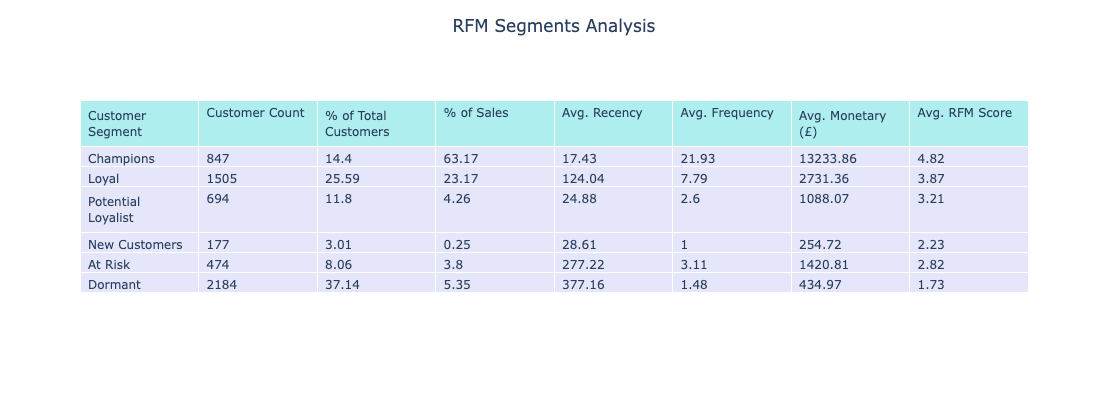

In [15]:
header_data = ['Customer Segment', 'Customer Count', '% of Total Customers', '% of Sales',\
               'Avg. Recency', 'Avg. Frequency', 'Avg. Monetary (£)', 'Avg. RFM Score' ]

fig = go.Figure(data=[go.Table(
    header=dict(values=header_data,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(
        values=[rfm[col].tolist() for col in rfm.columns],
        fill_color='lavender',
        align='left'
    )
)])
fig.update_layout(
    height=400,
    title={
        'text': "RFM Segments Analysis",
        'y':0.95,  
        'x':0.5,   
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.write_image("../visualizations/RFM_table.png", width=1000, height=400)
fig.show()


In [88]:
# Calculate average overall frequency and AOV (= average order value)
#print(rfm)
avg_freq = rfm['customer_count'].dot(rfm['avg_frequency']) / rfm['customer_count'].sum()
AOV = (rfm['customer_count'] * rfm['avg_monetary']).sum()/(rfm['customer_count'] * rfm['avg_frequency']).sum()

print(AOV)
print(avg_freq)



479.7266858304052
6.289154905628295


In [87]:
total_sales = (rfm['customer_count'] * rfm['avg_monetary']).sum()
total_orders = (rfm['customer_count'] * rfm['avg_frequency']).sum()
total_customers = rfm['customer_count'].sum()
aov = (rfm['customer_count'] * rfm['avg_monetary']).sum()/(rfm['customer_count'] * rfm['avg_frequency']).sum()
print(total_customers)
print(total_sales)
print(total_orders)
print(aov)

479.7266858304052


This bar chart shows the average RFM  score for each customer segment. 
Higher scores indicate more valuable customers.

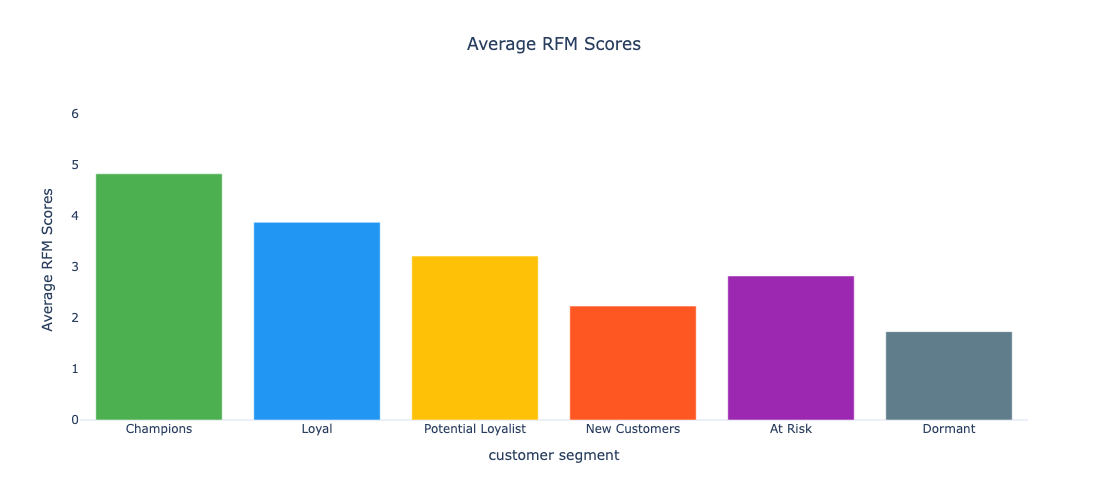

In [13]:
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#607D8B', '#E91E63']
fig = px.bar(
    rfm, 
    x='customer_segment', 
    y='avg_rfm_score', 
    color = 'customer_segment',
    color_discrete_sequence = colors,
    title = 'Average RFM Scores',
    labels = {
        'customer_segment': 'customer segment',
        'avg_rfm_score': 'Average RFM Scores'
    },
    height = 500,
    width = 1000
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,
                 range = [0, max (rfm['avg_rfm_score']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.write_image("../visualizations/avg_RFM_score.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_avg_RFM_score.html")
fig.show()

This bar chart displays percentage of customers in each RFM segment. 

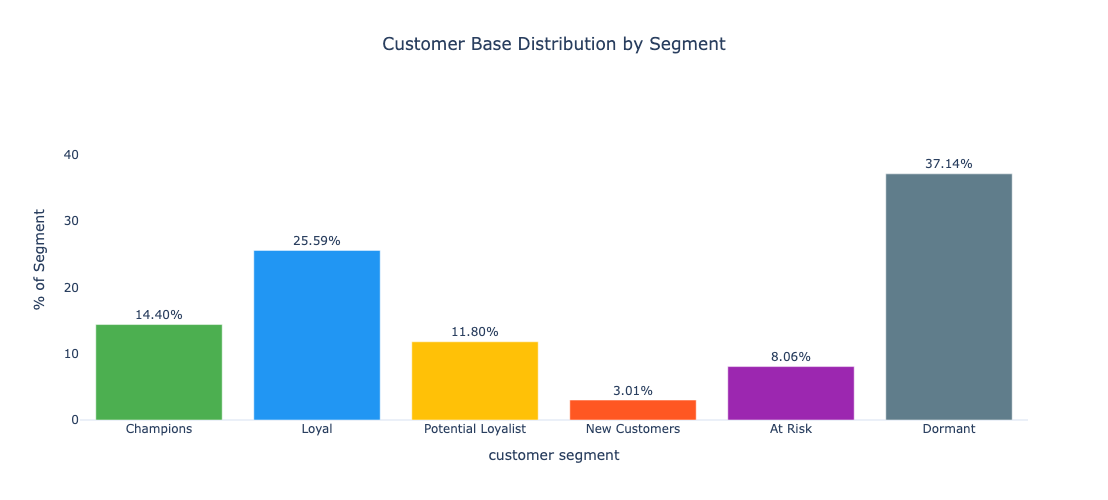

In [14]:
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#607D8B', '#E91E63']
fig = px.bar(
    rfm, 
    x='customer_segment', 
    y='pct_segment', 
    color = 'customer_segment',
    color_discrete_sequence = colors,
    title = 'Customer Base Distribution by Segment',
    labels = {
        'customer_segment': 'customer segment',
        'pct_segment': '% of Segment'
    },
    height = 500,
    width = 1000,
    text_auto=True,
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,  
                 range = [0, max (rfm['pct_segment']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.update_traces(
    textposition='outside',  
    texttemplate='%{y:.2f}%' 
)
fig.write_image("../visualizations/customer_segment_distribution.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_customer_segment_distribution.html")
fig.show()

This bar chart illustrates the percentage of total revenue generated by each customer segment.

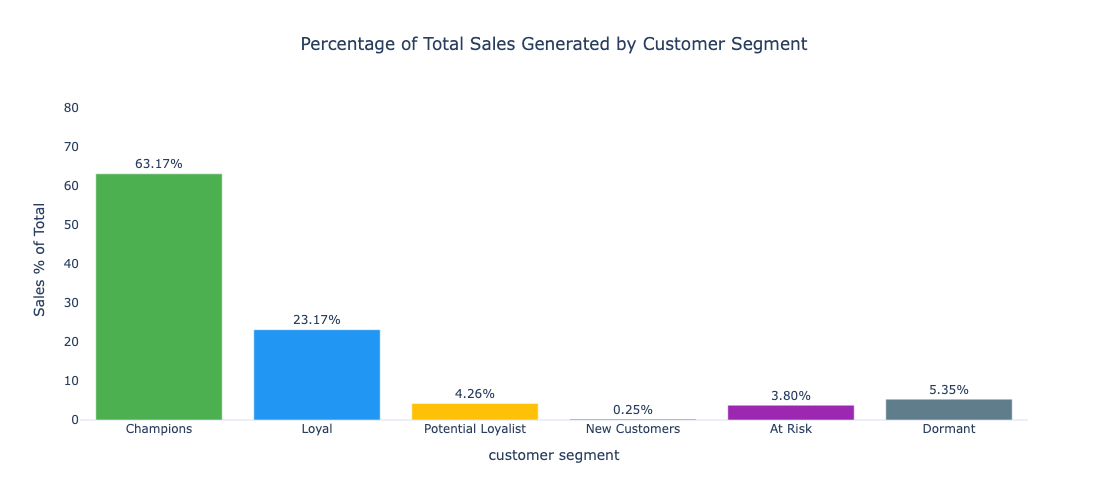

In [16]:
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#607D8B', '#E91E63']
fig = px.bar(
    rfm, 
    x='customer_segment', 
    y='pct_revenue', 
    color = 'customer_segment',
    color_discrete_sequence = colors,
    title = 'Percentage of Total Sales Generated by Customer Segment',
    labels = {
        'customer_segment': 'customer segment',
        'pct_revenue': 'Sales % of Total'
    },
    height = 500,
)

fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,  
                 range = [0, max (rfm['pct_revenue']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.update_traces(
    textposition='outside',  
    texttemplate='%{y:.2f}%' 
)
fig.write_image("../visualizations/customer_segment_sales.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_customer_segment_sales.html")
fig.show()

# Custome Lifetime Value (CLV)
The table below compares **Champions**, **Non-Champions**, and the **overall customer base** across four key metrics:
- Average Order Value (AOV) in 2011  
- Purchase Frequency in 2011  
- Retention Rate (2010 → 2011)  
- Estimated Customer Lifetime Value (CLV)

CLV calculated as AOV × Frequency × 1/(1 – Retention Rate).

In [2]:
clv = pd.read_csv("../data/CLV_metrics.csv")

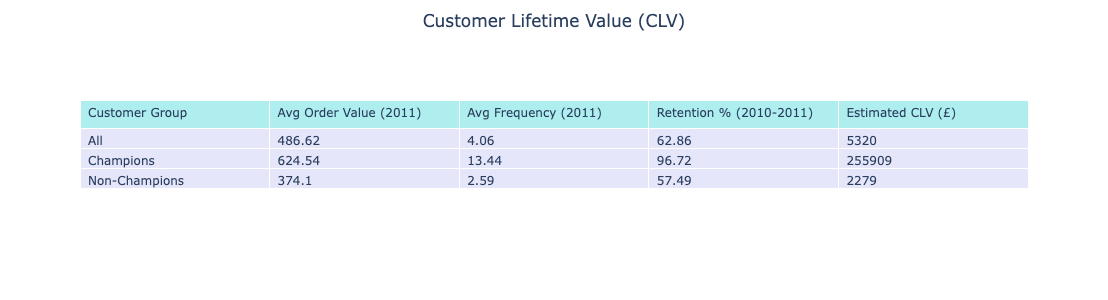

In [3]:
header_data = ["Customer Group", "Avg Order Value (2011)", "Avg Frequency (2011)", "Retention % (2010-2011)", "Estimated CLV (£)" ]

fig = go.Figure(data=[go.Table(
    header=dict(values=header_data,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(
        values=[clv[col].tolist() for col in clv.columns],
        fill_color='lavender',
        align='left'
    )
)])
fig.update_layout(
    height=300,
    title={
        'text': "Customer Lifetime Value (CLV)",
        'y':0.95,  
        'x':0.5,   
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.write_image("../visualizations/CLV_table.png", width=1000, height=300)
fig.show()


# Customer Retention

### Repeat Purchase Rate
The following bar chart displays the percentage of customers making a second purchase.

In [2]:
ret = pd.read_csv('../data/retention_analysis.csv')
print(ret)

   total_customers  repeat_customers  repeat_spending  pct_repeat_spending  \
0             5881              4255      17175255.33                 96.8   

   single_purchase_customers  single_spending  pct_single_spending  \
0                       1626        568173.83                  3.2   

   pct_repeat  pct_single  
0       72.35       27.65  


In [3]:
ret_plot = pd.DataFrame({
    'Customer Type': ['Single Purchase', 'Multiple Purchases'],
    'Percentage': [ret.loc[0,'pct_single'],
                  ret.loc[0, 'pct_repeat']]
})
print(ret_plot)

        Customer Type  Percentage
0     Single Purchase       27.65
1  Multiple Purchases       72.35


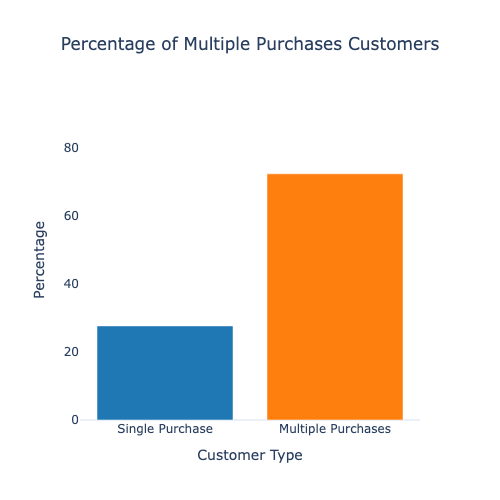

In [5]:
fig = px.bar(
    ret_plot,
    x = 'Customer Type',
    y = 'Percentage',
    color = 'Customer Type',
    color_discrete_sequence = px.colors.qualitative.D3,
    title = 'Percentage of Multiple Purchases Customers',
    height = 500,  
    width = 500,
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,range=[0, max(ret_plot['Percentage']) * 1.3]),
    title_x = 0.5,
    template = 'plotly_white'
)
fig.write_image("../visualizations/repeat_purchase.png", width=500, height=500)
fig.write_html("../visualizations/interactive_repeat_purchase.html")
pio.write_image(fig, 'ret_plot.png', width=500, height=500)
Image('ret_plot.png')

### Repeat Purchase Rate Within 90 Days of First Purchase
The following chart illustrates the percentage of the customer base that completed a second transaction within 90 days of their initial purchase.

In [6]:
ret90 = pd.read_csv('../data/retention_90days.csv')
print(ret90)

   total_first_buyers  total_spending  repeat_buyers_90days  \
0                5881     17743429.16                  2721   

   total_repeat90_spending  pct_repeat_revenue  pct_repeat_90days  \
0              14329774.39               80.76              46.27   

   non_repeat_90days  pct_non_repeat_90days  
0               3160                  53.73  


In [7]:
ret90_plot = pd.DataFrame({
    'Customer Type': ['Single Purchase', 'Multiple Purchases' ],
    'Percentage': [ret90.loc[0, 'pct_non_repeat_90days'],
                  ret90.loc[0, 'pct_repeat_90days']]
})
print(ret90_plot)

        Customer Type  Percentage
0     Single Purchase       53.73
1  Multiple Purchases       46.27


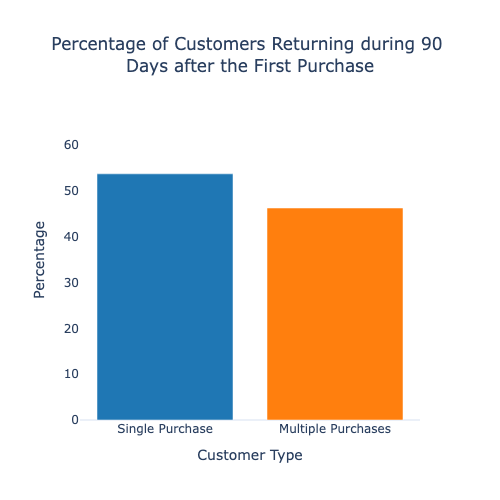

In [9]:
fig = px.bar(
    ret90_plot,
    x = 'Customer Type',
    y = 'Percentage',
    color = 'Customer Type',
    color_discrete_sequence = px.colors.qualitative.D3,
    title = 'Percentage of Customers Returning during 90 <br>Days after the First Purchase',
    height = 500,
    width = 500,
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,range=[0, max(ret90_plot['Percentage']) * 1.3]),
    title_x = 0.5,
    template = 'plotly_white',
)
fig.write_image("../visualizations/repeat_90days.png", width=500, height=500)
fig.write_html("../visualizations/interactive_repeat_90days.html")
pio.write_image(fig, 'ret90_plot.png', width=500, height=500)
Image('ret90_plot.png')

# Cohort Analysis Overall

### New Customer Acquisition Month-over-Month
The following bar chart displays the total number of new customers acquired each month.

In [24]:
# Load cohort data
cohort = pd.read_csv("../data/cohort_analysis.csv")
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cohort_month              325 non-null    object 
 1   months_since_acquisition  325 non-null    int64  
 2   retained_customers        325 non-null    int64  
 3   cohort_size               325 non-null    int64  
 4   retention_rate_pct        325 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 12.8+ KB


In [25]:
# Convert cohort_month to datetime
cohort['cohort_month'] = pd.to_datetime(cohort['cohort_month'])
cohort.head()

,cohort_month,months_since_acquisition,retained_customers,cohort_size,retention_rate_pct
0,2009-12-01,0,955,955,100.00
1,2009-12-01,1,337,955,35.29
2,2009-12-01,2,319,955,33.40
3,2009-12-01,3,406,955,42.51
4,2009-12-01,4,363,955,38.01


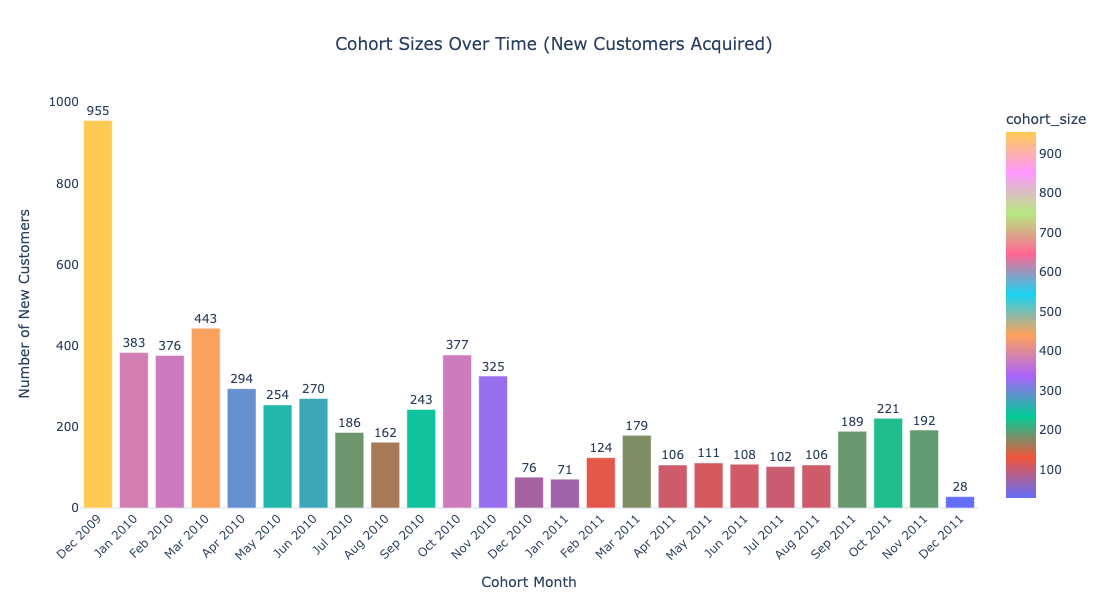

In [20]:
cohort_sizes = cohort.groupby(['cohort_month'])['cohort_size'].first().reset_index()
cohort_sizes['cohort_month'] = cohort_sizes['cohort_month'].dt.strftime('%b %Y')
fig = px.bar(
    cohort_sizes,
    x='cohort_month',           
    y='cohort_size',           
    title='Cohort Sizes Over Time (New Customers Acquired)',
    color='cohort_size',        
    color_continuous_scale=px.colors.qualitative.Plotly 
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False), 
    template = 'plotly_white',
    xaxis_title="Cohort Month",
    yaxis_title="Number of New Customers",
    xaxis_tickangle=-45,       
    width=1000, 
    height=600,
)
fig.update_layout(
    showlegend=False, 
    template = 'plotly_white',
    title_x = 0.5,
)
fig.update_traces(text=cohort_sizes['cohort_size'], textposition='outside')
fig.write_image("../visualizations/cohort_size.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_cohort_size.html")
fig.show()


### Customer Retention Analysis Over Time
The following heatmap visualizes the month-over-month customer retention rates for various acquisition cohorts.

In [26]:
# Create a retention matrix(pivot table)
retention_pivot = cohort.pivot_table(index='cohort_month', columns='months_since_acquisition', 
                                 values='retention_rate_pct', aggfunc='first')
# Remove month 0 since aquisition
retention_pivot = retention_pivot.iloc[:, 1:]  
retention_pivot

months_since_acquisition,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
cohort_month,,,,,,,,,,,,,,,,,,,,,
2009-12-01,35.29,33.40,42.51,38.01,35.92,37.70,34.24,33.61,36.23,42.20,...,30.26,26.28,30.26,28.27,25.97,25.55,31.52,30.47,40.73,19.69
2010-01-01,20.63,31.07,30.55,26.37,30.03,25.85,22.98,27.94,31.85,30.29,...,15.14,23.50,19.84,18.54,19.58,24.28,19.32,24.54,5.74,NaN
2010-02-01,23.67,22.34,28.99,24.47,19.95,19.15,28.46,25.27,27.39,11.44,...,19.95,15.96,16.22,14.36,22.87,22.87,16.22,5.85,NaN,NaN
2010-03-01,18.96,23.02,24.15,23.25,20.32,24.60,30.25,27.54,10.84,11.51,...,16.93,17.38,15.58,17.61,20.09,21.22,7.90,NaN,NaN,NaN
2010-04-01,19.39,19.39,16.33,18.37,22.45,27.55,26.19,10.54,10.88,7.48,...,15.65,13.95,14.97,18.03,22.45,5.78,NaN,NaN,NaN,NaN
2010-05-01,15.75,16.93,17.32,17.72,25.59,21.26,12.60,5.91,8.27,11.42,...,12.60,13.78,16.54,15.35,4.72,NaN,NaN,NaN,NaN,NaN
2010-06-01,17.41,18.89,20.37,22.96,28.52,12.59,8.89,8.15,11.85,10.74,...,12.22,13.33,20.37,5.19,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,15.59,18.28,29.57,29.03,13.98,11.29,14.52,14.52,11.29,13.44,...,17.20,23.66,8.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,20.37,29.63,32.10,17.28,11.73,9.88,12.35,13.58,12.96,12.96,...,19.75,6.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


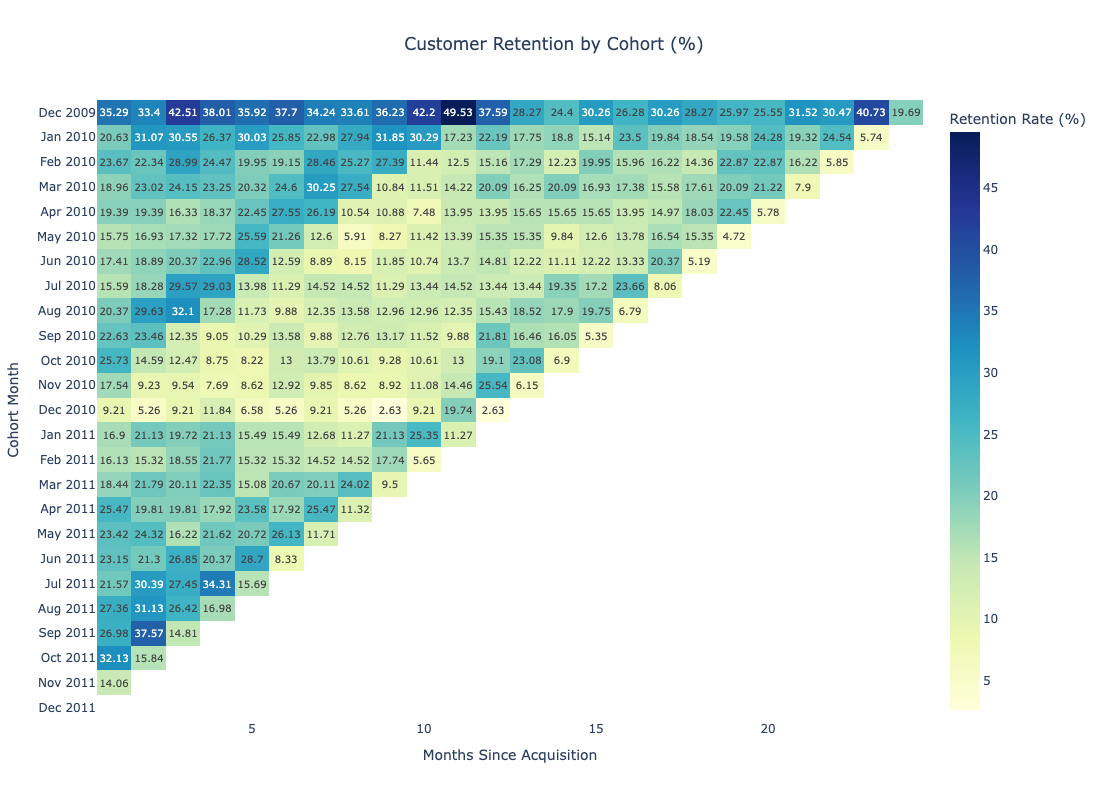

In [28]:
retention_pivot.index = retention_pivot.index.strftime('%b %Y') 

fig = px.imshow(
    retention_pivot,
    text_auto=True,  
    aspect="auto",   
    color_continuous_scale='YlGnBu',  
    title='Customer Retention by Cohort (%)'
)

fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False),  
    xaxis_title="Months Since Acquisition",
    yaxis_title="Cohort Month",
    coloraxis_colorbar_title="Retention Rate (%)",
    template = 'plotly_white',
    width=1200, 
    height=800,
    title_x = 0.5,
)
fig.write_image("../visualizations/cohort_heatmap.png", width=1200, height=800)
fig.write_html("../visualizations/interactive_cohort_heatmap.html")
fig.show()

### Monthly Average Retention Rate (All Cohorts)
This chart displays the average retention rate across all cohorts, with data broken down by month since the initial purchase.

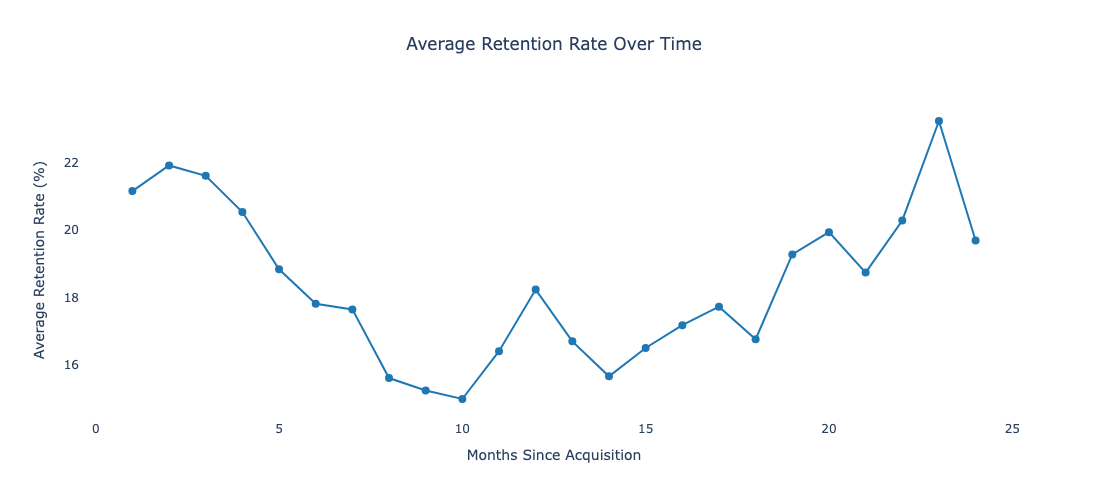

In [29]:
 # Average across cohorts per month since acquisition
avg_retention = retention_pivot.mean(axis=0) 

fig = px.line(
    avg_retention,
    x=avg_retention.index,           
    y=avg_retention.values,   
    markers=True,                    
    title='Average Retention Rate Over Time'
)
fig.update_traces(
    line_color='#1f77b4',
    marker=dict(size=8)   
)
fig.update_layout(
    xaxis_title="Months Since Acquisition",
    yaxis_title="Average Retention Rate (%)",
    xaxis=dict(showgrid=False, showline=False, zeroline=False),  
    yaxis = dict(showgrid=False, showline=False, zeroline=False),  
    template = 'plotly_white',
    width=1000, 
    height=500,
    title_x = 0.5,
)

fig.write_image("../visualizations/cohort_avg.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_cohort_avg.html")

fig.show()

# Cohort Analysis: Champion Customers

In [30]:
# Load cohort data for Champions
cohort_champ = pd.read_csv("../data/cohort_analysis_champions.csv")
cohort_champ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cohort_month              318 non-null    object 
 1   months_since_acquisition  318 non-null    float64
 2   retained_customers        318 non-null    int64  
 3   cohort_size               318 non-null    int64  
 4   retention_rate_pct        318 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 12.5+ KB


In [31]:
# Create a retention matrix(pivot table)
retention_pivot_champ = cohort_champ.pivot_table(index='cohort_month', columns='months_since_acquisition', 
                                 values='retention_rate_pct', aggfunc='first')
# Remove month 0 since aquisition
retention_pivot_champ = retention_pivot_champ.iloc[:, 1:]  
retention_pivot_champ

months_since_acquisition,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2009-12,55.23,55.23,64.88,57.10,54.42,63.00,58.45,56.03,60.59,67.29,...,57.64,49.87,58.98,55.76,53.08,51.47,61.93,59.79,80.43,42.36
2010-01,31.58,55.26,43.42,50.00,60.53,55.26,46.05,50.00,55.26,56.58,...,34.21,52.63,47.37,52.63,56.58,57.89,51.32,78.95,23.68,NaN
2010-02,32.26,32.26,50.00,38.71,41.94,46.77,58.06,54.84,61.29,30.65,...,53.23,51.61,33.87,45.16,61.29,59.68,62.90,24.19,NaN,NaN
2010-03,51.22,46.34,54.88,51.22,45.12,50.00,62.20,58.54,23.17,31.71,...,40.24,51.22,43.90,48.78,57.32,74.39,32.93,NaN,NaN,NaN
2010-04,46.51,46.51,44.19,41.86,48.84,53.49,58.14,32.56,25.58,23.26,...,41.86,41.86,44.19,51.16,79.07,23.26,NaN,NaN,NaN,NaN
2010-05,38.10,47.62,33.33,61.90,71.43,57.14,57.14,38.10,38.10,57.14,...,47.62,61.90,52.38,76.19,23.81,NaN,NaN,NaN,NaN,NaN
2010-06,42.31,30.77,57.69,69.23,69.23,50.00,26.92,38.46,38.46,38.46,...,53.85,65.38,73.08,34.62,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,21.74,60.87,73.91,86.96,43.48,52.17,56.52,52.17,43.48,47.83,...,69.57,86.96,47.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,56.25,56.25,68.75,62.50,31.25,31.25,25.00,62.50,25.00,43.75,...,87.50,37.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


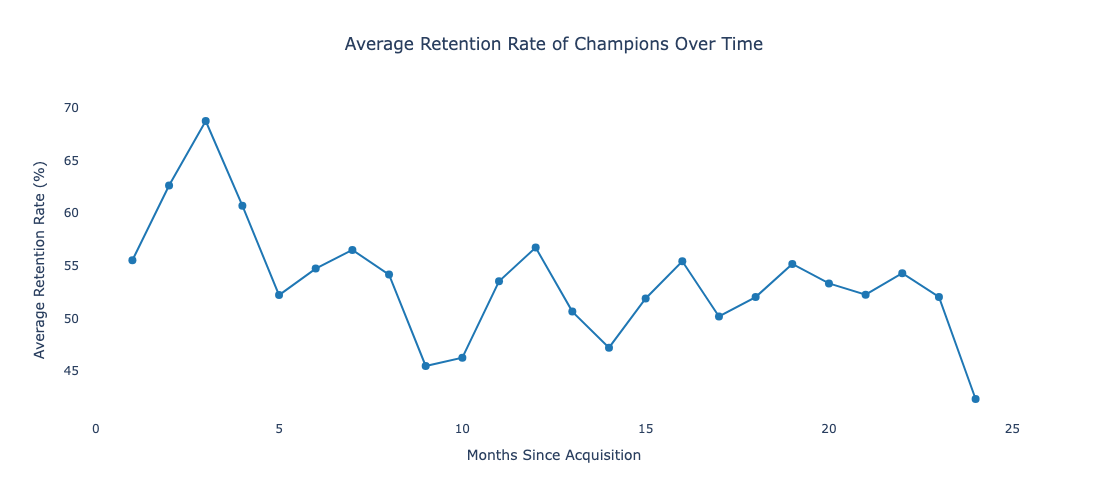

In [32]:
# Fill NaN values in the upper-left triangle of the DataFrame with 0
upper_right = np.triu(np.ones(retention_pivot_champ.shape)).astype(bool)
upper_left = np.fliplr(upper_right)
retention_pivot_champ = retention_pivot_champ.where(~upper_left, retention_pivot_champ.fillna(0))

# Assign NaN value to last cohor for Month 1 retention, because of incomplete data for the next month
m, n = retention_pivot_champ.shape
retention_pivot_champ.iloc[m-1, 0] = np.nan

# Average monthly retention rate across all cohorts
avg_retention_champ = retention_pivot_champ.mean(axis=0) 

# Line chart of Average monthly retention rates
fig = px.line(
    avg_retention_champ,
    x=avg_retention_champ.index,           
    y=avg_retention_champ.values,   
    markers=True,                    
    title='Average Retention Rate of Champions Over Time'
)
fig.update_traces(
    line_color='#1f77b4',
    marker=dict(size=8)   
)
fig.update_layout(
    xaxis_title="Months Since Acquisition",
    yaxis_title="Average Retention Rate (%)",
    xaxis=dict(showgrid=False, showline=False, zeroline=False),  
    yaxis = dict(showgrid=False, showline=False, zeroline=False),  
    template = 'plotly_white',
    width=1000, 
    height=500,
    title_x = 0.5,
)

fig.write_image("../visualizations/cohort_avg_champ.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_cohort_avg_champ.html")

fig.show()


### Top 10 Customers
This bar chart illustrates the total spending by the top 10 customers from the Retail II UCI dataset, identified by their CustomerID.

In [20]:
top10 = pd.read_csv('../data/top10_customers.csv')
print(top10)

   customerid  count_invoice  total_purchase
0       18102            145       608821.65
1       14646            152       528602.52
2       14156            156       313946.37
3       14911            398       295972.63
4       17450             51       246973.09
5       13694            143       196482.81
6       17511             60       175603.55
7       16446              2       168472.50
8       16684             55       147142.77
9       12415             28       144458.37


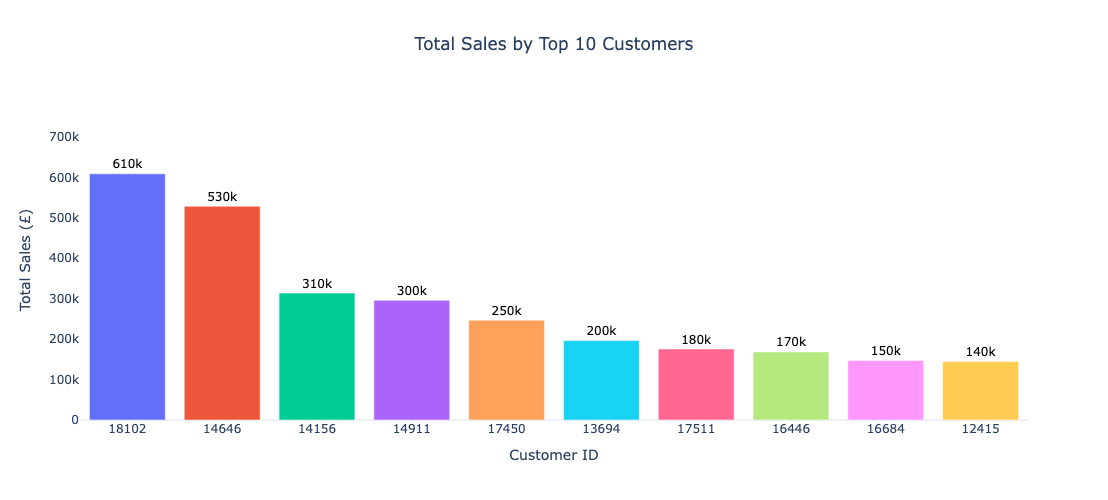

In [21]:
top10['customerid'] = top10['customerid'].astype(str)
fig = px.bar(
    top10,
    x= 'customerid',
    y= 'total_purchase',
    color = 'customerid',
    color_discrete_sequence = px.colors.qualitative.Plotly,
    title = 'Total Sales by Top 10 Customers',
    labels = {
        'customerid': 'Customer ID',
        'total_purchase': 'Total Sales (£)'
    },
    height = 500,
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,range=[0, max(top10['total_purchase']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.update_traces(
    texttemplate='%{y:.2s}', 
    textposition = 'outside', 
    textfont = dict(size=12, color='black')
)
fig.write_image("../visualizations/top10_customers.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_top10_customers.html")
fig.show()

# Product Performance

### Top 10 products by unit sold

In [2]:
top10p = pd.read_csv('../data/top10_products_by_quantity.csv')
print(top10p)

                          description  total_sales_quantity  total_sales
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS                110249     25259.90
1  WHITE HANGING HEART T-LIGHT HOLDER                 96688    266923.55
2       ASSORTED COLOUR BIRD ORNAMENT                 81817    132187.92
3         PAPER CRAFT , LITTLE BIRDIE                 80995    168469.60
4             JUMBO BAG RED RETROSPOT                 79285    150935.56
5      MEDIUM CERAMIC TOP STORAGE JAR                 78033     81700.92
6                 BROCADE RING PURSE                  71440     14959.19
7  PACK OF 60 PINK PAISLEY CAKE CASES                 56794     28490.98
8         60 TEATIME FAIRY CAKE CASES                 54716     27404.22
9                SMALL POPCORN HOLDER                 49984     44090.13


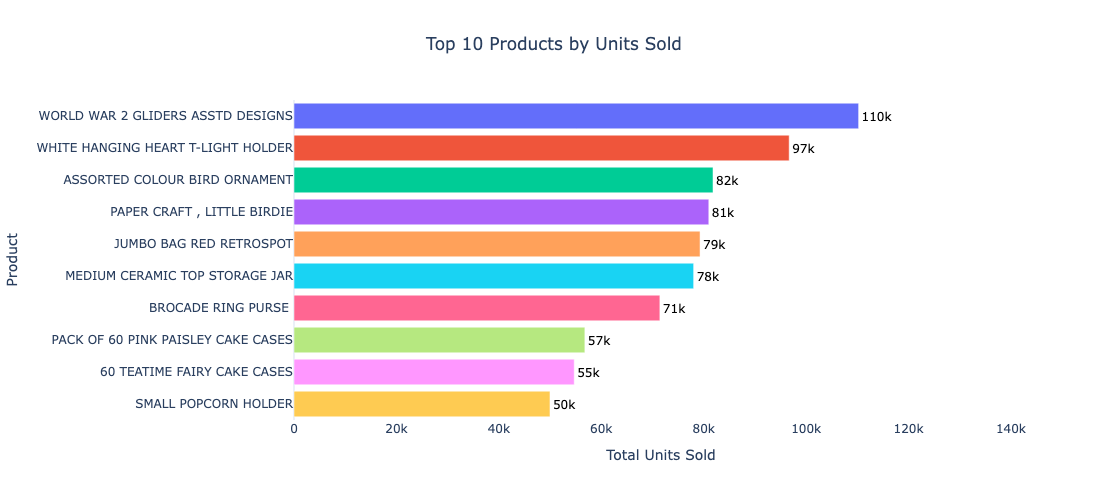

In [4]:
fig = px.bar(
    top10p,
    y = top10p['description'],
    x = top10p['total_sales_quantity'],
    color = 'description',
    color_discrete_sequence = px.colors.qualitative.Plotly,
    title = 'Top 10 Products by Units Sold ',
    labels = {
        'description': 'Product',
        'total_sales_quantity': 'Total Units Sold',
    },
    height = 500,
    width = 1000,
)
fig.update_layout(
    showlegend=False, 
    yaxis=dict(showgrid=False),
    xaxis = dict(showgrid=False,range=[0, max(top10p['total_sales_quantity']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.update_traces(
    texttemplate='%{x:.2s}', 
    textposition = 'outside', 
    textfont = dict(size=12, color='black')
)
fig.write_image("../visualizations/top10_products_quantity.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_top10_products_quantity.html")
fig.show()

### Top 10 products by Sales

In [22]:
top10rev = pd.read_csv('../data/top10_products_by_revenue.csv')
print(top10rev)

                           description  total_sales
0             REGENCY CAKESTAND 3 TIER    344563.25
1   WHITE HANGING HEART T-LIGHT HOLDER    266923.55
2          PAPER CRAFT , LITTLE BIRDIE    168469.60
3              JUMBO BAG RED RETROSPOT    150935.56
4                        PARTY BUNTING    149187.05
5        ASSORTED COLOUR BIRD ORNAMENT    132187.92
6      PAPER CHAIN KIT 50'S CHRISTMAS     123141.54
7                        CHILLI LIGHTS     85489.91
8       MEDIUM CERAMIC TOP STORAGE JAR     81700.92
9  ROTATING SILVER ANGELS T-LIGHT HLDR     74448.92


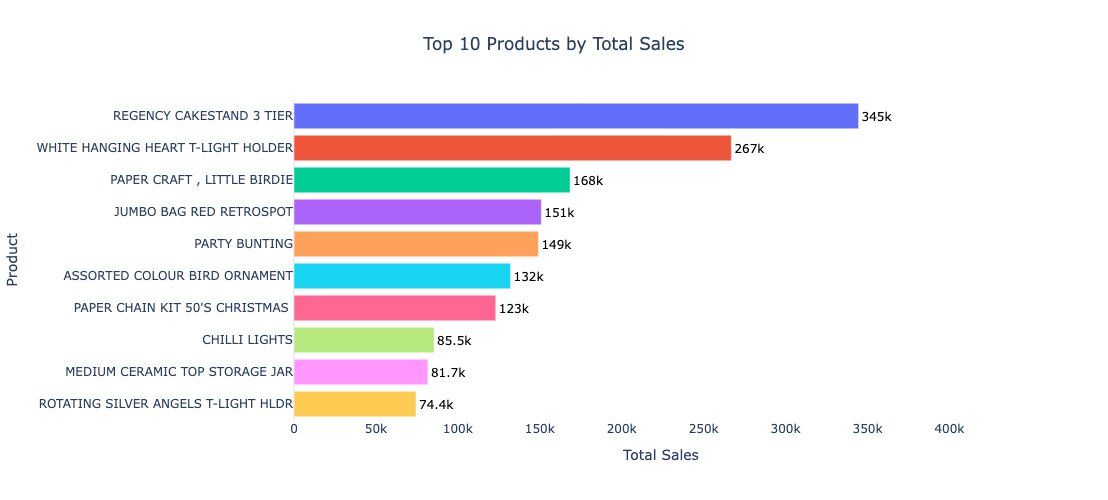

In [23]:
fig = px.bar(
    top10rev,
    y = top10rev['description'],
    x = top10rev['total_sales'],
    color = 'description',
    color_discrete_sequence = px.colors.qualitative.Plotly,
    title = 'Top 10 Products by Total Sales',
    labels = {
        'description': 'Product',
        'total_sales': 'Total Sales',
    },
    height = 500,
    width = 1000,
)
fig.update_layout(
    showlegend=False, 
    yaxis=dict(showgrid=False),
    xaxis = dict(showgrid=False, range=[0, max(top10rev['total_sales']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.update_traces(
    texttemplate='%{x:.3s}', 
    textposition = 'outside', 
    textfont = dict(size=12, color='black')
)

fig.write_image("../visualizations/top10_products_revenue.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_top10_products_revenue.html")
fig.show()


### Consistently Popular Products (Frequency Analysis)

The following bar chart illustrates which products appear most often within the monthly top five list.

In [17]:
top5m = pd.read_csv("../data/top5_products_month_quantity.csv")
print(top5m.head())

  year_month                         description  total_quantity  total_sales  \
0    2009-12  WHITE HANGING HEART T-LIGHT HOLDER            6445     17357.60   
1    2009-12      PACK OF 12 RED SPOTTY TISSUES             5363      1386.31   
2    2009-12            PACK OF 12 SKULL TISSUES            5247      1321.83   
3    2009-12    PACK OF 72 RETRO SPOT CAKE CASES            5006      2568.35   
4    2009-12        PACK OF 12 WOODLAND TISSUES             4882      1253.24   

   rank  
0     1  
1     2  
2     3  
3     4  
4     5  


In [25]:
frequency_monthly_5 = top5m['description'].value_counts()[:5].reset_index()
print(frequency_monthly_5)

                          description  count
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS     13
1             JUMBO BAG RED RETROSPOT     10
2  WHITE HANGING HEART T-LIGHT HOLDER     10
3     PACK OF 72 RETROSPOT CAKE CASES      7
4                 BROCADE RING PURSE       6


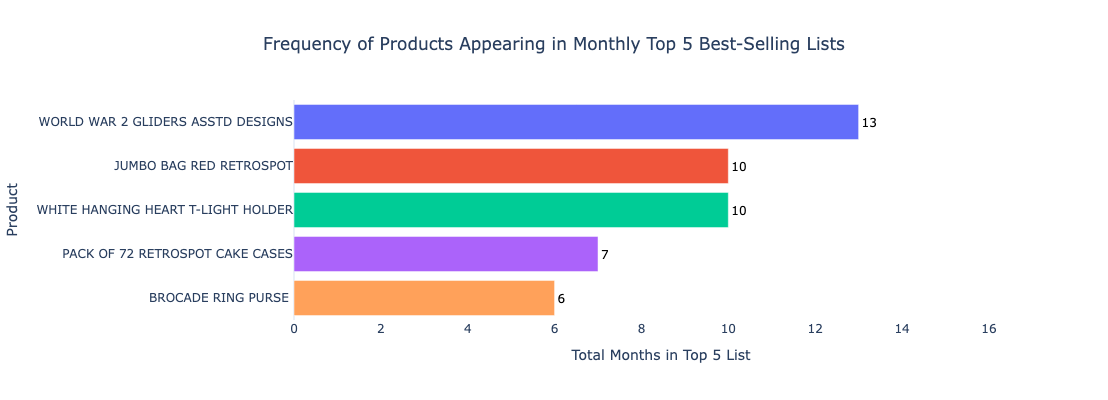

In [40]:
fig = px.bar(
    frequency_monthly_5,
    y = 'description',
    x = 'count',
    color = 'description',
    color_discrete_sequence = px.colors.qualitative.Plotly,
    title = 'Frequency of Products Appearing in Monthly Top 5 Best-Selling Lists',
    labels = {
        'description': 'Product',
        'count': 'Total Months in Top 5 List',
    },
    height = 400,
    width = 1000,
)
fig.update_layout(
    showlegend=False, 
    yaxis=dict(showgrid=False),
    xaxis = dict(showgrid=False,range=[0, max(frequency_monthly_5['count']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.update_traces(
    texttemplate='%{x}', 
    textposition = 'outside', 
    textfont = dict(size=12, color='black')
)
fig.write_image("../visualizations/top5_frequency_monthly.png", width=1000, height=400)
fig.write_html("../visualizations/interactive_top5_frequency_monthly.html")
fig.show()

The following bar chart illustrates which products appear most often within the monthly top five list.

In [19]:
top5q = pd.read_csv("../data/top5_products_quarter_quantity.csv")
print(top5q.head())

  year_quarter                         description  total_quantity  \
0      2009-Q4  WHITE HANGING HEART T-LIGHT HOLDER            6445   
1      2009-Q4      PACK OF 12 RED SPOTTY TISSUES             5363   
2      2009-Q4            PACK OF 12 SKULL TISSUES            5247   
3      2009-Q4    PACK OF 72 RETRO SPOT CAKE CASES            5006   
4      2009-Q4        PACK OF 12 WOODLAND TISSUES             4882   

   total_sales  rank  
0     17357.60     1  
1      1386.31     2  
2      1321.83     3  
3      2568.35     4  
4      1253.24     5  


In [32]:
frequency_quarterly_5 = top5q['description'].value_counts()[:5].reset_index()
print(frequency_quarterly_5)

                          description  count
0  WHITE HANGING HEART T-LIGHT HOLDER      6
1   WORLD WAR 2 GLIDERS ASSTD DESIGNS      6
2    PACK OF 72 RETRO SPOT CAKE CASES      3
3             JUMBO BAG RED RETROSPOT      3
4                      POPCORN HOLDER      2


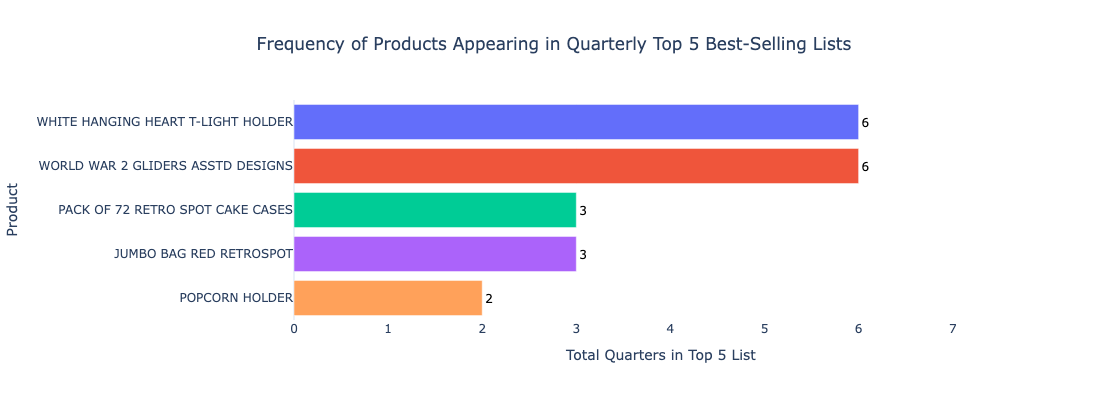

In [41]:
fig = px.bar(
    frequency_quarterly_5,
    y = 'description',
    x = 'count',
    color = 'description',
    color_discrete_sequence = px.colors.qualitative.Plotly,
    title = 'Frequency of Products Appearing in Quarterly Top 5 Best-Selling Lists',
    labels = {
        'description': 'Product',
        'count': 'Total Quarters in Top 5 List',
    },
    height = 400,
    width = 1000,
)
fig.update_layout(
    showlegend=False, 
    yaxis=dict(showgrid=False),
    xaxis = dict(showgrid=False,range=[0, max(frequency_quarterly_5['count']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5
)
fig.update_traces(
    texttemplate='%{x}', 
    textposition = 'outside', 
    textfont = dict(size=12, color='black')
)
fig.write_image("../visualizations/top5_frequency_quarterly.png", width=1000, height=400)
fig.write_html("../visualizations/interactive_top5_frequency_quarterly.html")
fig.show()

# Sales Trends: Monthly and Quarterly

This bar chart displays the monthly sales, spanning December 2009 to December 2011.
The chart highlights trends in sales performance over time, helping to identify peak sales months, seasonal patterns, or periods of low performance for strategic planning, such as inventory management.

In [34]:
mstats = pd.read_csv('../data/monthly_stats.csv')
print(mstats)

   year_month  total_sales  total_units  total_invoices  avg_sales_per_invoice
0     2009-12    825685.76       445861            1839                 448.99
1     2010-01    652708.50       396087            1205                 541.67
2     2010-02    553713.30       392763            1282                 431.91
3     2010-03    833570.13       531689            1770                 470.94
4     2010-04    627934.63       387241            1513                 415.03
5     2010-05    659858.86       425348            1642                 401.86
6     2010-06    752270.14       415541            1719                 437.62
7     2010-07    606681.15       359616            1585                 382.76
8     2010-08    697274.91       522803            1511                 461.47
9     2010-09    924333.01       594108            1911                 483.69
10    2010-10   1126558.04       624378            2371                 475.14
11    2010-11   1470272.48       733705            2

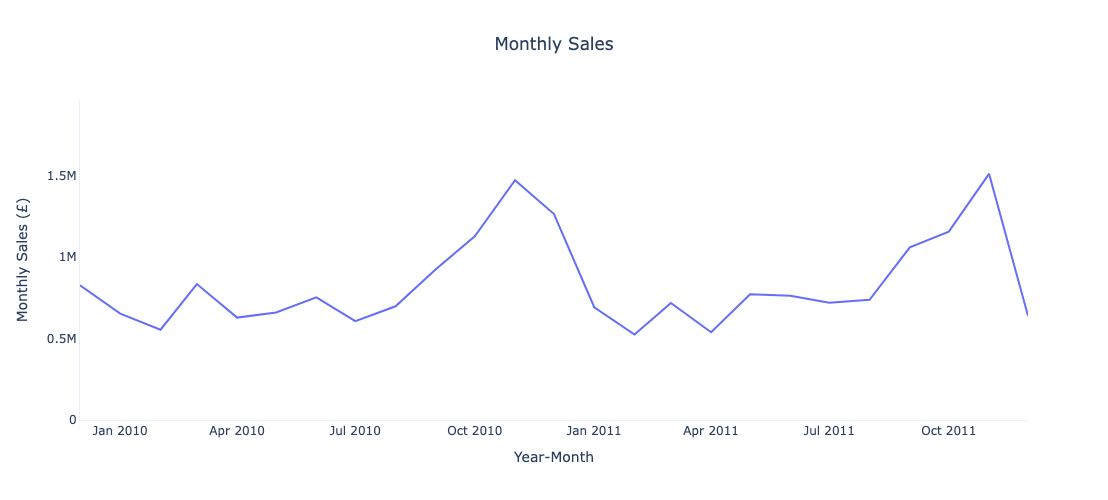

In [35]:
fig = px.line(
    mstats,
    x = mstats['year_month'],
    y = mstats['total_sales'],
    title = 'Monthly Sales',
    labels = {
        'year_month': 'Year-Month',
        'total_sales': 'Monthly Sales (£)'
    },
    height = 500,
    width =1000
)
fig.update_layout(
    showlegend = False,
    yaxis = dict(range=[0, max(mstats['total_sales']) * 1.3], 
                 showgrid = False,
                 showline = True,
                ),
    xaxis = dict(showgrid=False,
                showline = True),
    template = 'plotly_white',
    title_x = 0.5,
)
fig.write_image("../visualizations/monthly_sales.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_monthly_sales.html")
fig.show()

Quarterly sales, spanning December 2009 to December 2011.

In [36]:
qstats = pd.read_csv('../data/quarterly_stats.csv')
print(qstats)

  year_quarter  total_sales  total_units  total_invoices  \
0      2009-Q4    825685.76       445861            1839   
1      2010-Q1   2039991.93      1320539            4257   
2      2010-Q2   2040063.63      1228130            4874   
3      2010-Q3   2228289.07      1476527            5007   
4      2010-Q4   3859429.31      1902847            6868   
5      2011-Q1   1932635.81      1069361            3777   
6      2011-Q2   2070084.54      1105938            4625   
7      2011-Q3   2514825.62      1407971            4845   
8      2011-Q4   3303286.31      1715396            5852   

   avg_sales_per_invoice  
0                 448.99  
1                 479.21  
2                 418.56  
3                 445.03  
4                 561.94  
5                 511.69  
6                 447.59  
7                 519.06  
8                 564.47  


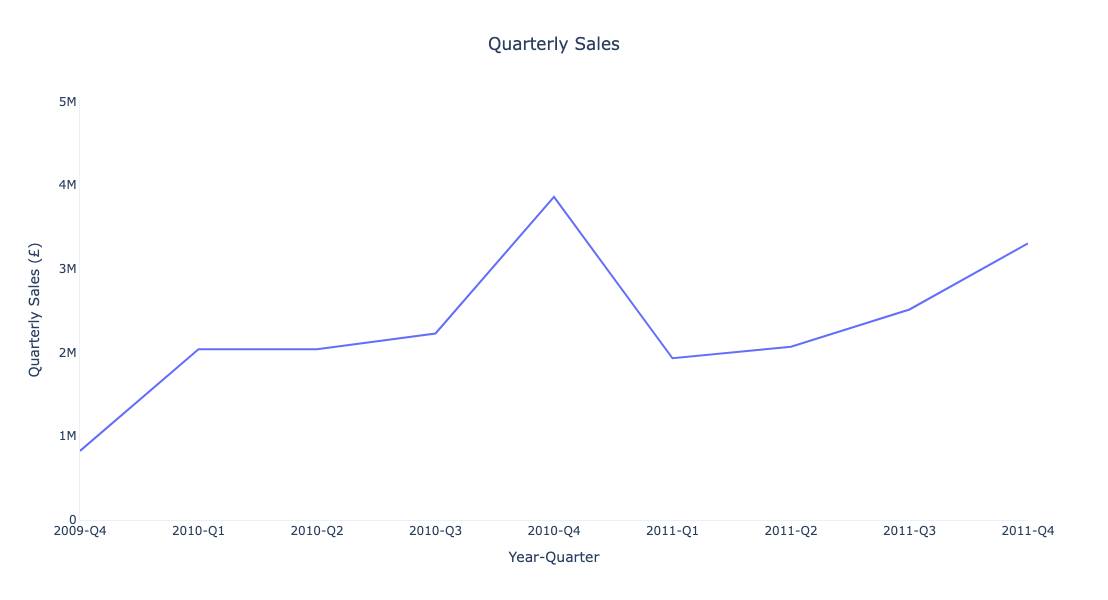

In [37]:
fig = px.line(
    qstats,
    x = qstats['year_quarter'],
    y = qstats['total_sales'],
    title = 'Quarterly Sales',
    labels = {
        'year_quarter': 'Year-Quarter',
        'total_sales': 'Quarterly Sales (£)'
    },
    height = 600,
)
fig.update_layout(
    showlegend = False,
    yaxis = dict(range=[0, max(qstats['total_sales']) * 1.3], 
                 showgrid = False,
                 showline = True,
                ),
    xaxis = dict(showgrid=False,
                showline = True),
    template = 'plotly_white',
    title_x = 0.5,
)
fig.write_image("../visualizations/quarterly_sales.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_quarterly_sales.html")
fig.show()

Total sales for each day of the week summed from december 2009 to december 2011.

In [38]:
daily_stats = pd.read_csv('../data/daily_stats.csv')
print(daily_stats)

   day_of_week   day_name  count_invoices  total_sales
0            0  SUNDAY               4838   1847010.29
1            1  MONDAY               6740   3601098.36
2            2  TUESDAY              7774   4185862.91
3            3  WEDNESDAY            7514   3562864.50
4            4  THURSDAY             8630   4252797.81
5            5  FRIDAY               6418   3354855.06
6            6  SATURDAY               30      9803.05


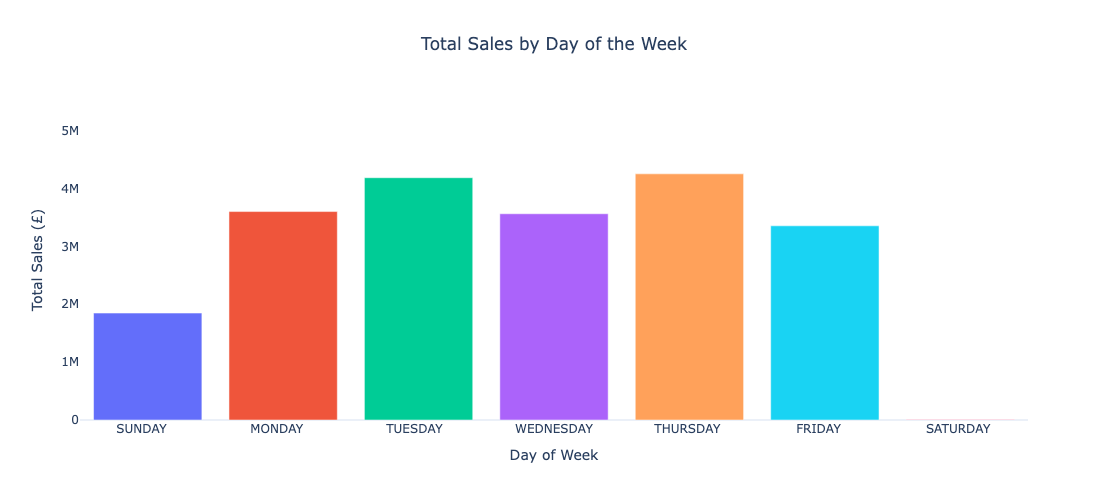

In [39]:
fig = px.bar(
    daily_stats,
    x = 'day_name',
    y = 'total_sales',
    color = 'day_name',
    color_discrete_sequence = px.colors.qualitative.Plotly,
    title = 'Total Sales by Day of the Week',
    labels = {
        'day_name': 'Day of Week',
        'total_sales': 'Total Sales (£)',
    },
    height = 500,
    width = 1000,
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,range=[0, max(daily_stats['total_sales']) * 1.3]),
    template = 'plotly_white',
    title_x = 0.5,
)
fig.update_traces(textposition='auto', textfont=dict(size=12, color='black'))
fig.write_image("../visualizations/day_of_week_sales.png", width=1000, height=500)
fig.write_html("../visualizations/interactive_day_of_week_sales.html")
fig.show()

Total sales of Chrismas period from december 2009 to December 2001.

In [10]:
chrismas = pd.read_csv('../data/chrismas_stats.csv')
print(chrismas)

  year_month  count_invoices  total_sales  avg_sales_per_invoice
0    2009-12            1839    825685.76                 448.99
1    2010-12            1629   1262598.79                 775.08
2    2011-12             839    638810.68                 761.40


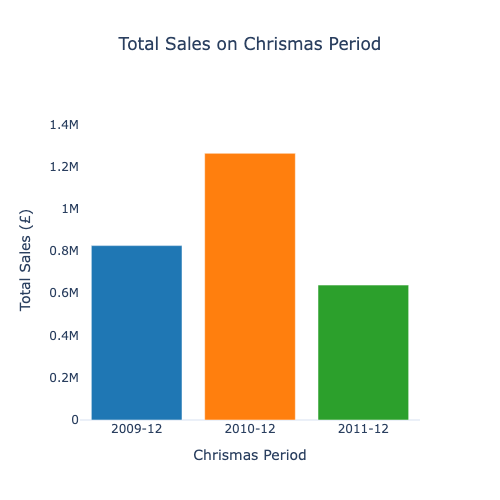

In [11]:
fig = px.bar(
    chrismas,
    x = 'year_month',
    y = 'total_sales',
    color = 'year_month',
    color_discrete_sequence = px.colors.qualitative.D3,
    title = 'Total Sales on Chrismas Period',
    labels = {
        'year_month': 'Chrismas Period',
        'total_sales': 'Total Sales (£)',
    },
    height = 500,
    width = 500
)
fig.update_layout(
    showlegend=False, 
    xaxis=dict(showgrid=False),
    yaxis = dict(showgrid=False,range=[0, max(chrismas['total_sales']) * 1.2]),
    template = 'plotly_white',
    title_x = 0.5,
)

fig.update_xaxes(type='category')
fig.update_traces(textposition='auto', textfont=dict(size=12, color='black'))
fig.write_image("../visualizations/sales_chrismas.png", width=500, height=500)
fig.write_html("../visualizations/interactive_sales_chrismas.html")
pio.write_image(fig, 'chrismas.png', width=500, height=500)
Image('chrismas.png')